# Detecting biases in black-box AI models using inspirations from Psychology: a tutorial and applications in Python: demo  
Daniel Acuna and Lizhen Liang  
ADSA Annual meeting  
October 14-16, 2020 | 8am-3pm Pacific time, daily

Loading the package

In [4]:
from fair_AI import load_pretrain
from fair_AI.detection import twoafc_experiment, bisect_search, psy_cur, pse, similarity

The following code download and loads the 100 dimentional GloVe model and assign it to a Python dictionary|

In [5]:
embeddings_dict = load_pretrain.get_glove_100d()

Showing word vectors: the similarity between man and king is almost equal to the similarity between woman and queen.

In [6]:
similarity(embeddings_dict.get('man'), embeddings_dict.get('king')) \
    - similarity(embeddings_dict.get('woman'), embeddings_dict.get('queen'))

0.002352774143218994

Calculating psychometric curve: showing that when there is more woman in "nurse", we couldn't decide whether a nurse is man or woman given word vectors, which means that according to word vectors, a nurse is more likely to be a woman.

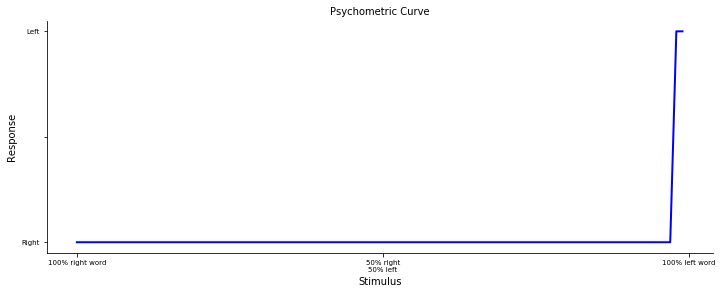

In [7]:
psy_cur('woman', 'man', 'nurse', embeddings_dict)

We now do the same thing at scale: we now define a set of target words, which are all occupations. On the other hand, we have a handful of word pairs indicating male and female:

In [8]:
careers = ['technician', 'accountant', 'supervisor', 'engineer', 'worker', 'educator', 'clerk', 'counselor', 'inspector', 
           'mechanic', 'manager', 'therapist', 'administrator', 'salesperson', 'receptionist', 'librarian', 'advisor', 
           'pharmacist', 'janitor', 'psychologist', 'physician', 'carpenter', 'nurse', 'investigator', 'bartender', 
           'specialist', 'electrician', 'officer', 'pathologist', 'teacher', 'lawyer', 'planner', 'practitioner', 
           'plumber', 'instructor', 'surgeon', 'veterinarian', 'paramedic', 'examiner', 'chemist', 'machinist', 
           'appraiser', 'nutritionist', 'architect', 'hairdresser', 'baker', 'programmer', 'paralegal', 'hygienist', 'scientist']

gender_pairs = []
gender_pairs.append(['woman', 'man'])
gender_pairs.append(['female', 'male'])
gender_pairs.append(['she', 'he'])
gender_pairs.append(['her', 'him'])
gender_pairs.append(['hers', 'his'])
gender_pairs.append(['daughter', 'son'])
gender_pairs.append(['girl', 'boy'])
gender_pairs.append(['sister', 'brother'])

We can calculate the points of subjective equivalence and visualize them:

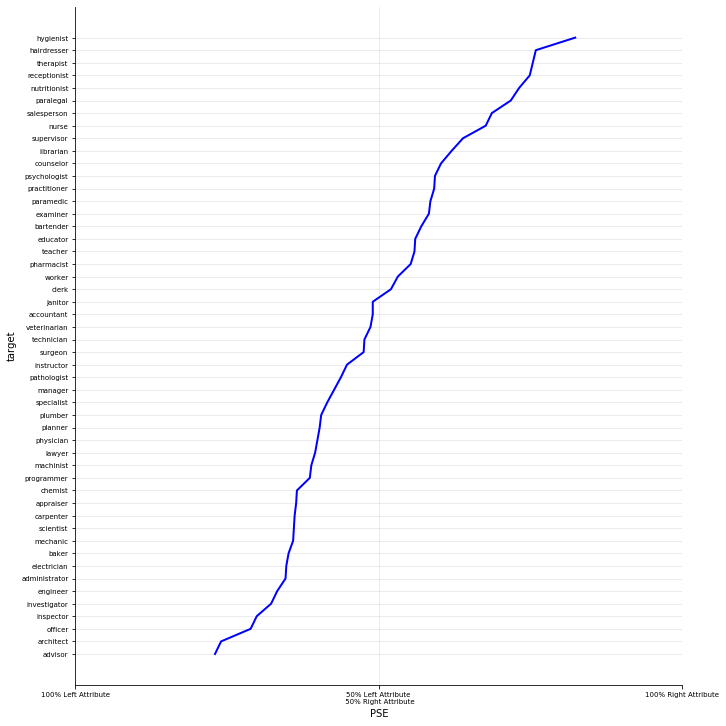

In [9]:
pse(gender_pairs, careers, embeddings_dict)

We can also define other target words and word pairs:

In [10]:
programming_languages = ['python', 'ruby', 'julia', 'java', 'php']

pairs = []
pairs.append(['easy', 'hard'])
pairs.append(['amateur', 'expert'])

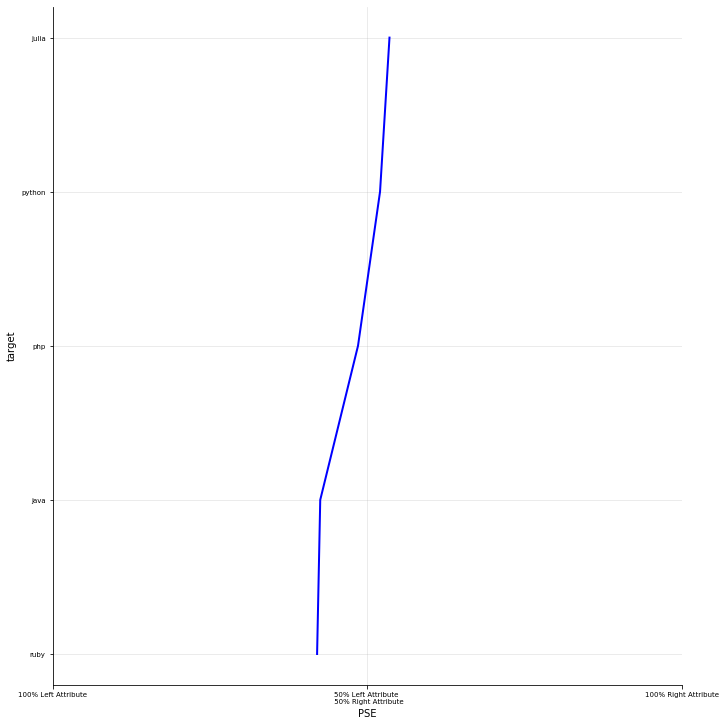

In [11]:
pse(pairs, programming_languages, embeddings_dict)